# Speech Emotion Recognition

Speech is the most natural way of expressing ourselves as humans. It is only natural 
then to extend this communication medium to computer applications. We define 
speech emotion recognition (SER) systems as a collection of methodologies that 
process and classify speech signals to detect the embedded emotions

In [138]:
import numpy as np
import pandas as pd
from pathlib import Path
import crepe

#To split the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#for the confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, classification_report

#useful for plotting
import matplotlib.pyplot as plt
import math
%matplotlib inline
import seaborn as sns

import os
from sklearn.metrics import confusion_matrix
import librosa
import librosa.display

#To listen to the audio
import IPython

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import tensorflow.keras.layers as tfl
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy, CategoricalAccuracy
from tensorflow import keras
#To prevent showing the warnings
import warnings
warnings.filterwarnings('ignore')

## Reading and understanding the data.

### We will use the Crema dataset which is speech emotion:

SAD - sadness

ANG - angry

DIS  - disgust

FEA  - fear

HAP  - happy

NEU  - neutral

In [2]:
#the crema path
crema_path = 'E:/term 8/pattern/assignment 3/Crema'

In [3]:
#Empty list to append each audio with it's corresponding class.
crema=[]
#looping through the file
for wav in os.listdir(crema_path):
    #splitting each line by -
    audio = wav.partition(".wav")[0].split('_')
    if audio[2]=='SAD': #if it's a sad audio
        crema.append(('sad',crema_path+'/'+wav))
    elif audio[2]=='ANG': #if it is an angry audio
        crema.append(('angry',crema_path+'/'+wav))
    elif audio[2]=='DIS': #if it is a disgust audio
        crema.append(('disgust',crema_path+'/'+wav))
    elif audio[2]=='FEA': #if it is a fear audio
        crema.append(('fear',crema_path+'/'+wav))
    elif audio[2]=='HAP': # if it is a happy audio
        crema.append(('happy',crema_path+'/'+wav))
    elif audio[2]=='NEU': # if it is a neautral audio.
        crema.append(('neutral',crema_path+'/'+wav))
#covert to a dataframe with 2 coloumns
df=pd.DataFrame.from_dict(crema)
df.rename(columns={0:'Emotion',1:'audio_Path'},inplace=True)

In [4]:
#printing the data frame
df

,Emotion,audio_Path
0,angry,E:/term 8/pattern/assignment 3/Crema/1001_DFA_...
1,disgust,E:/term 8/pattern/assignment 3/Crema/1001_DFA_...
2,fear,E:/term 8/pattern/assignment 3/Crema/1001_DFA_...
3,happy,E:/term 8/pattern/assignment 3/Crema/1001_DFA_...
4,neutral,E:/term 8/pattern/assignment 3/Crema/1001_DFA_...
...,...,...
7437,disgust,E:/term 8/pattern/assignment 3/Crema/1091_WSI_...
7438,fear,E:/term 8/pattern/assignment 3/Crema/1091_WSI_...
7439,happy,E:/term 8/pattern/assignment 3/Crema/1091_WSI_...
7440,neutral,E:/term 8/pattern/assignment 3/Crema/1091_WSI_...


In [5]:
#the unique values in the data frame
df['Emotion'].unique()

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad'],
      dtype=object)

### Plotting the waveform for each class

In [6]:
#To plot the waveform.
def wave_plot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(f'{emotion} emotion waveplot', size=10)
    librosa.display.waveshow(y=data,sr=sr)

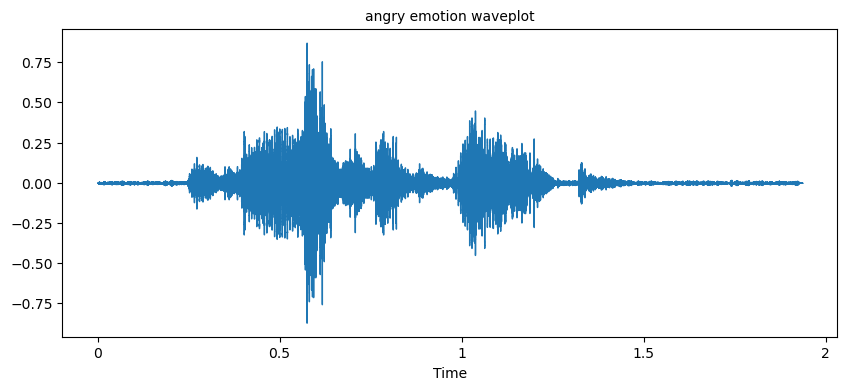

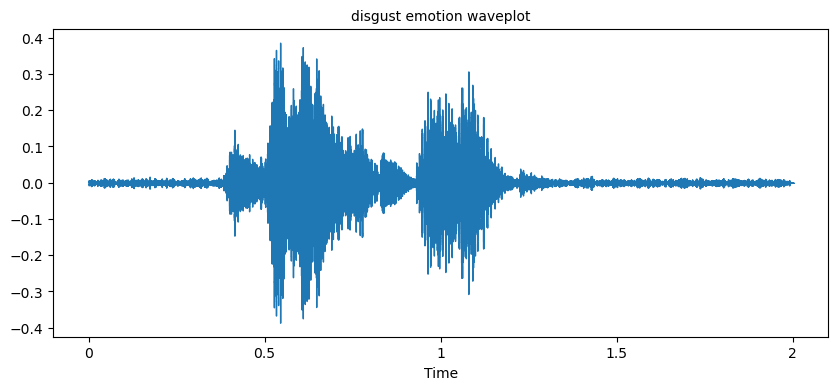

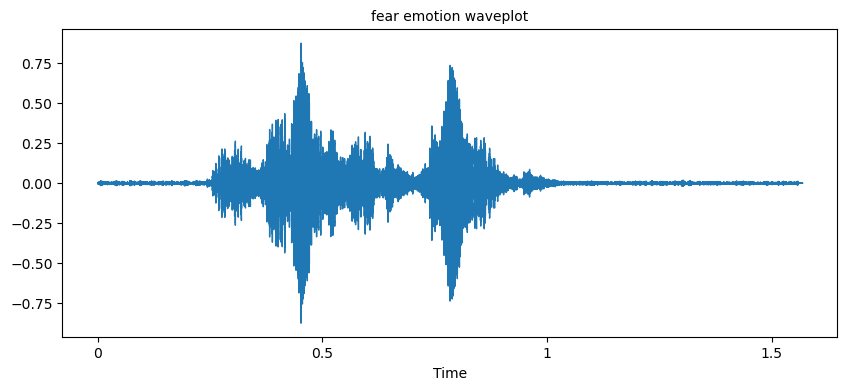

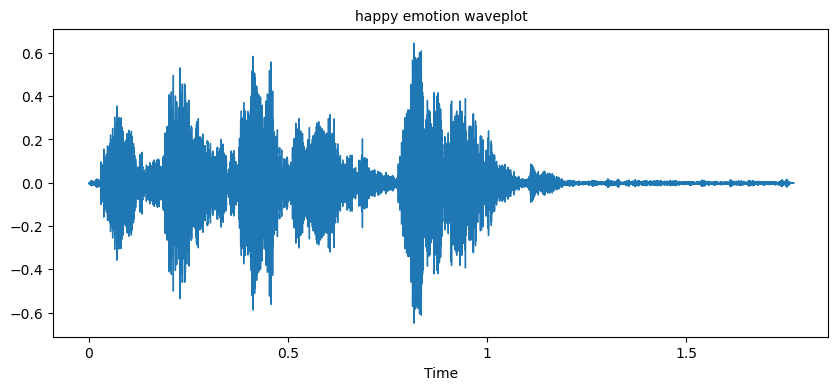

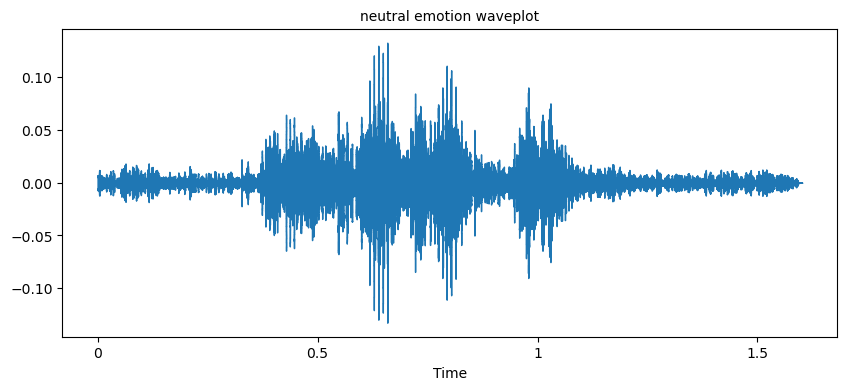

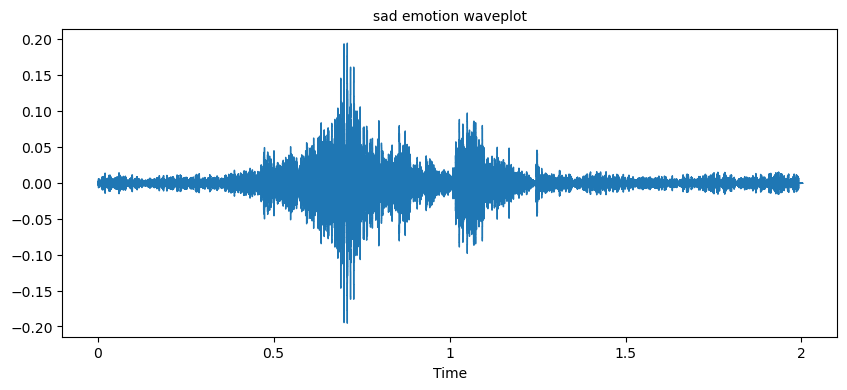

In [7]:
audio_path=[]
for emotion in df['Emotion'].unique():
    #Getting the path of each audio.
    path=np.array(df['audio_Path'][df['Emotion']==emotion])[1]
    #getting the samples and sr of the audios
    data, sr=librosa.load(path) # the data is the a vector of the audio represntation.
    #Plotting the waveform of each class.
    wave_plot(data,sr,emotion)
    #spectogram(data,sr,emotion)
    audio_path.append(path)

### Listening to each emotion

In [8]:
#The angry emotion.
print('Angry emotion Audio\n')
IPython.display.Audio(audio_path[0])

Angry emotion Audio



In [9]:
#The disgust disgust.
print('disgust emotion Audio\n')
IPython.display.Audio(audio_path[1])

disgust emotion Audio



In [10]:
#The fear emotion.
print('Fear emotion Audio\n')
IPython.display.Audio(audio_path[2])

Fear emotion Audio



In [11]:
#The happy emotion.
print('Happy emotion Audio\n')
IPython.display.Audio(audio_path[3])

Happy emotion Audio



In [12]:
#The Neutral emotion.
print('Neutral emotion Audio\n')
IPython.display.Audio(audio_path[4])

Neutral emotion Audio



In [13]:
#The Sad emotion.
print('Sad emotion Audio\n')
IPython.display.Audio(audio_path[5])

Sad emotion Audio



### Reading the audio

In [15]:
audio_arrays = []
for i in df['audio_Path']:
    x, sr = librosa.load(i)
    audio_arrays.append(x)
    

In [17]:
df['audio_array'] = audio_arrays

In [18]:
df

,Emotion,audio_Path,audio_array
0,angry,E:/term 8/pattern/assignment 3/Crema/1001_DFA_...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,disgust,E:/term 8/pattern/assignment 3/Crema/1001_DFA_...,"[0.00085288694, 0.0012764621, 0.0014729768, 0...."
2,fear,E:/term 8/pattern/assignment 3/Crema/1001_DFA_...,"[0.007794192, 0.009154029, 0.008037197, 0.0082..."
3,happy,E:/term 8/pattern/assignment 3/Crema/1001_DFA_...,"[-0.0041458835, -0.0039893533, -0.0028449348, ..."
4,neutral,E:/term 8/pattern/assignment 3/Crema/1001_DFA_...,"[0.002309598, 0.0019039362, 0.0010728665, 0.00..."
...,...,...,...
7437,disgust,E:/term 8/pattern/assignment 3/Crema/1091_WSI_...,"[0.0009527768, 0.0013712022, 0.0013245873, 0.0..."
7438,fear,E:/term 8/pattern/assignment 3/Crema/1091_WSI_...,"[-0.006815622, -0.007511144, -0.006344846, -0...."
7439,happy,E:/term 8/pattern/assignment 3/Crema/1091_WSI_...,"[-0.0021392633, -0.0021440976, -0.0019210262, ..."
7440,neutral,E:/term 8/pattern/assignment 3/Crema/1091_WSI_...,"[-0.0015703149, -0.0014095085, -0.0007496869, ..."


### functions to extract features from the audio array

In [28]:
#Zero crossing rate
def zcr(data):
    zcr=librosa.feature.zero_crossing_rate(data)
    return np.squeeze(zcr)
#Energy
def rmse(data):
    rmse=librosa.feature.rms(data)
    rmse=rmse/max(abs(data))
    return np.squeeze(rmse)
#Spectral centroid
def centr(data):
    return np.squeeze(librosa.feature.spectral_centroid(data))
#Spectral bandwidth
def bw(data):
    return  np.squeeze(librosa.feature.spectral_bandwidth(data))
#Mel-frequency cepstral coefficients
def mfc(data):
    return (librosa.feature.mfcc(data, sr=sr, n_mfcc=16)).T
#Mel-spectrogram
def melspectro(data):
    return  librosa.power_to_db(librosa.feature.melspectrogram(data,n_mels=16).T,ref=np.max)
#Spectral roll-off
def roll(data):
    return np.squeeze(librosa.feature.spectral_rolloff(y=data, sr=sr))

In [29]:
mfc(audio_arrays[1]).shape

(101, 16)

## Creating the feature space

In [30]:
features = np.zeros((7442,216,37))
c=0
#for each audio there're 216x37 features 
one_audio_features = np.zeros((216,37))
for i in df['audio_array']:
    zero_cross = zcr(i)
    energy = rmse(i)
    centroid = centr(i)
    bandwidth = bw(i)
    mfcc=mfc(i)
    mel = melspectro(i)
    rol = roll(i)
    one_audio_features[:len(zero_cross),0] = zero_cross
    one_audio_features[:len(energy),1] = energy 
    one_audio_features[:len(centroid),2] = centroid
    one_audio_features[:len(bandwidth),3] = bandwidth
    one_audio_features[:len(mfcc),4] = rol
    one_audio_features[:len(rol),5:21] = mfcc
    one_audio_features[:len(mel),21:37] = mel
    features[c] = one_audio_features
    c = c+1

#### encoding the emotions

In [33]:
def mapping(label):
    if label == 'neutral':
        return [1,0,0,0,0,0]
    elif label == 'happy':
        return [0,1,0,0,0,0]
    elif label == 'angry':
        return [0,0,1,0,0,0]
    elif label == 'disgust':
        return [0,0,0,1,0,0]
    elif label == 'fear':
        return [0,0,0,0,1,0]
    elif label == 'sad':
        return [0,0,0,0,0,1]

In [34]:
labels = []
for i in np.array(df['Emotion']):
    labels.append(mapping(i))

In [35]:
labels = np.array(labels)
labels.shape

(7442, 6)

In [36]:
#Normalizing the data
for i in range(0, len(features)):
    scaler=StandardScaler()
    features[i] = scaler.fit_transform(features[i])

In [37]:
X_70, X_test, y_70, y_test = train_test_split(np.array(features),labels, train_size=0.7,random_state = 42 ,stratify=labels)
X_train, X_valid, y_train, y_valid = train_test_split(X_70,y_70, train_size=0.95,random_state = 42 ,stratify=y_70)

In [38]:
y_train.shape

(4948, 6)

In [80]:
tf_X_train = tf.convert_to_tensor(X_train)
tf_y_train = tf.convert_to_tensor(y_train)
tf_X_valid = tf.convert_to_tensor(X_valid)
tf_y_valid = tf.convert_to_tensor(y_valid)

In [105]:
model6 = tf.keras.models.Sequential()
model6.add(tf.keras.layers.Conv1D(filters=64, kernel_size=5,activation='relu',input_shape= (216, 37)))
model6.add(layers.Dropout(0.5))
model6.add(tf.keras.layers.MaxPooling1D())
model6.add(tf.keras.layers.Conv1D(filters=128, kernel_size=5,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model6.add(layers.Dropout(0.5))
model6.add(tf.keras.layers.MaxPooling1D())
model6.add(tf.keras.layers.Conv1D(filters=265, kernel_size=5,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model6.add(layers.Dropout(0.5))
model6.add(tf.keras.layers.MaxPooling1D())
model6.add(tf.keras.layers.Flatten())
model6.add(tf.keras.layers.Dense(512, activation='relu'))
model6.add(layers.Dropout(0.5))
model6.add(tf.keras.layers.Dense(64, activation='relu'))
model6.add(layers.Dropout(0.3))
model6.add(tf.keras.layers.Dense(6, activation='softmax'))
model6.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_51 (Conv1D)          (None, 212, 64)           11904     
                                                                 
 dropout_81 (Dropout)        (None, 212, 64)           0         
                                                                 
 max_pooling1d_51 (MaxPoolin  (None, 106, 64)          0         
 g1D)                                                            
                                                                 
 conv1d_52 (Conv1D)          (None, 102, 128)          41088     
                                                                 
 dropout_82 (Dropout)        (None, 102, 128)          0         
                                                                 
 max_pooling1d_52 (MaxPoolin  (None, 51, 128)          0         
 g1D)                                                

In [106]:
model6.compile(optimizer=Adam(lr=0.00001),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model6.fit(tf_X_train, tf_y_train, epochs=128,batch_size=2, validation_data=(tf_X_valid, tf_y_valid))

Epoch 1/128
2474/2474 [==============================] - 42s 16ms/step - loss: 4.6595 - accuracy: 0.1722 - val_loss: 4.3256 - val_accuracy: 0.2159
Epoch 2/128
2474/2474 [==============================] - 41s 16ms/step - loss: 4.3432 - accuracy: 0.1839 - val_loss: 4.2506 - val_accuracy: 0.2221
Epoch 3/128
2474/2474 [==============================] - 43s 17ms/step - loss: 4.2260 - accuracy: 0.1993 - val_loss: 4.1547 - val_accuracy: 0.2544
Epoch 4/128
2474/2474 [==============================] - 42s 17ms/step - loss: 4.0910 - accuracy: 0.2340 - val_loss: 4.0487 - val_accuracy: 0.2875
Epoch 5/128
2474/2474 [==============================] - 44s 18ms/step - loss: 3.9751 - accuracy: 0.2460 - val_loss: 3.9438 - val_accuracy: 0.3359
Epoch 6/128
2474/2474 [==============================] - 44s 18ms/step - loss: 3.8595 - accuracy: 0.2741 - val_loss: 3.8409 - val_accuracy: 0.3515
Epoch 7/128
2474/2474 [==============================] - 41s 16ms/step - loss: 3.7596 - accuracy: 0.2846 - val_loss: 3

2474/2474 [==============================] - 38s 15ms/step - loss: 1.7596 - accuracy: 0.5216 - val_loss: 1.9673 - val_accuracy: 0.5240
Epoch 57/128
2474/2474 [==============================] - 37s 15ms/step - loss: 1.7352 - accuracy: 0.5293 - val_loss: 1.9496 - val_accuracy: 0.5356
Epoch 58/128
2474/2474 [==============================] - 36s 15ms/step - loss: 1.7188 - accuracy: 0.5348 - val_loss: nan - val_accuracy: 0.5253
Epoch 59/128
2474/2474 [==============================] - 37s 15ms/step - loss: 1.7021 - accuracy: 0.5408 - val_loss: nan - val_accuracy: 0.5199
Epoch 60/128
2474/2474 [==============================] - 38s 16ms/step - loss: 1.6928 - accuracy: 0.5439 - val_loss: nan - val_accuracy: 0.5325
Epoch 61/128
2474/2474 [==============================] - 37s 15ms/step - loss: 1.6752 - accuracy: 0.5396 - val_loss: nan - val_accuracy: 0.5311
Epoch 62/128
2474/2474 [==============================] - 37s 15ms/step - loss: 1.6671 - accuracy: 0.5435 - val_loss: nan - val_accuracy:

2474/2474 [==============================] - 37s 15ms/step - loss: 1.0943 - accuracy: 0.6946 - val_loss: 1.5338 - val_accuracy: 0.5705
Epoch 112/128
2474/2474 [==============================] - 38s 15ms/step - loss: 1.0984 - accuracy: 0.6908 - val_loss: 1.5174 - val_accuracy: 0.5898
Epoch 113/128
2474/2474 [==============================] - 38s 15ms/step - loss: 1.1027 - accuracy: 0.6873 - val_loss: 1.5114 - val_accuracy: 0.5844
Epoch 114/128
2474/2474 [==============================] - 40s 16ms/step - loss: 1.0740 - accuracy: 0.6932 - val_loss: 1.5258 - val_accuracy: 0.5728
Epoch 115/128
2474/2474 [==============================] - 40s 16ms/step - loss: 1.0838 - accuracy: 0.6944 - val_loss: 1.5049 - val_accuracy: 0.5831
Epoch 116/128
2474/2474 [==============================] - 40s 16ms/step - loss: 1.0721 - accuracy: 0.6993 - val_loss: 1.5007 - val_accuracy: 0.5750
Epoch 117/128
2474/2474 [==============================] - 41s 16ms/step - loss: 1.0722 - accuracy: 0.6914 - val_loss: 1

In [146]:
from sklearn.metrics import accuracy_score
y_pred = model6.predict(X_test)
accuracy = accuracy_score(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1))
print(f'The accuracy is: {accuracy}')


70/70 [==============================] - 1s 8ms/step
The accuracy is: 0.5915808329601433


In [147]:
#getting the F1 score
f1 = f1_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1), average='micro')
print(f'The F1 score: {f1}')

The F1 score: 0.5915808329601433


<AxesSubplot:>

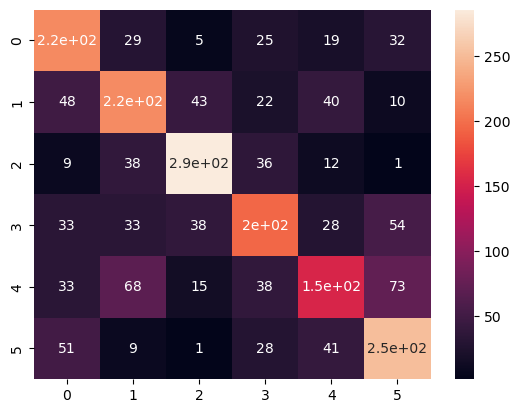

In [148]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1)))

sns.heatmap(confusion_matrix_df, annot=True)